  Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python_headless-4.11.0.86-cp37-abi3-win_amd64.whl (39.4 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Acceso denegado: 'c:\\Users\\juanj\\AppData\\Local\\Programs\\Python\\Python313\\Lib\\site-packages\\cv2\\cv2.pyd'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


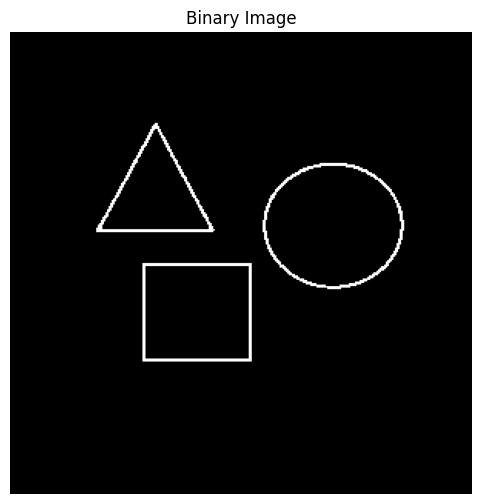

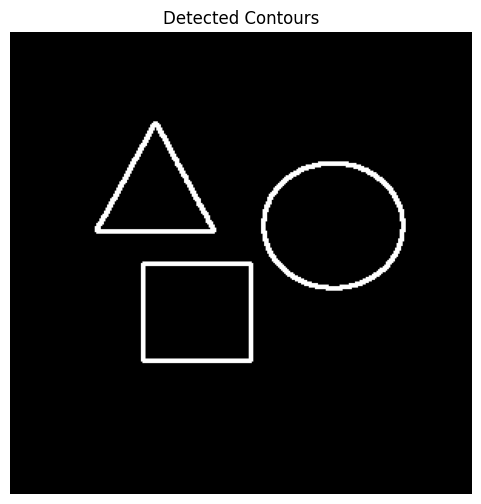

                Shape  Area  Perimeter    Centroid
0              Square  4410        266  (121, 181)
1  Approximate Circle  5765        285  (209, 125)
2            Triangle  2724        247   (93, 105)


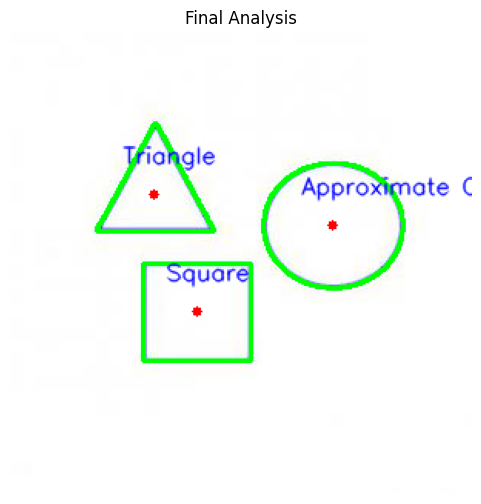

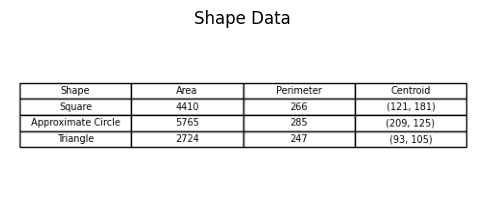

In [31]:
# Import necessary libraries
%pip install opencv-python-headless numpy matplotlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def show(title, image, cmap='gray'):
    plt.figure(figsize=(6,6))
    plt.title(title)
    plt.axis('off')
    plt.imshow(image, cmap=cmap)
    plt.show()

# Load and binarize image
image = cv2.imread('figura.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY_INV)
show('Binary Image', thresh)

# Find contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.zeros_like(gray)
cv2.drawContours(mask, contours, -1, 255, 2)
show('Detected Contours', mask)

# Analyze contours
output = image.copy()
shape_data = []

for cnt in contours:
    area = cv2.contourArea(cnt)
    peri = cv2.arcLength(cnt, True)
    M = cv2.moments(cnt)
    if M['m00'] != 0:
        cx = int(M['m10']/M['m00'])
        cy = int(M['m01']/M['m00'])
    else:
        cx, cy = 0, 0
    approx = cv2.approxPolyDP(cnt, 0.04 * peri, True)
    vertices = len(approx)
    if vertices == 3:
        shape = 'Triangle'
    elif vertices == 4:
        x, y, w, h = cv2.boundingRect(approx)
        shape = 'Square' if abs(w-h) < 0.1*max(w,h) else 'Rectangle'
    elif vertices > 4:
        shape = 'Approximate Circle'
    else:
        shape = 'Unknown Shape'
    cv2.drawContours(output, [cnt], -1, (0,255,0), 2)
    cv2.circle(output, (cx, cy), 3, (0,0,255), -1)
    shape_data.append([shape, int(area), int(peri), (cx, cy)])

# Create a DataFrame and convert it to an image
df = pd.DataFrame(shape_data, columns=['Shape', 'Area', 'Perimeter', 'Centroid'])
print(df)

# Convert the DataFrame to an image
fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center')
plt.savefig('table_data.png', bbox_inches='tight', pad_inches=0.1)
plt.close()

# Show the final image with labels
for cnt, data in zip(contours, shape_data):
    shape, area, peri, (cx, cy) = data
    cv2.putText(output, shape, (cx - 20, cy - 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)

show('Final Analysis', cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
show('Shape Data', plt.imread('table_data.png'))
